# Project data preprocessing
---



##### In this notebook, we will explore data preprocessing techniques using the student_habits_performance  dataset from Kaggle.
##### We will go through the following steps:
##### 1.Explore the dataset by:
 * Viewing random samples of data.
 *      Identifying the total number of rows and columns.
##### 2.Handle missing values by:
 *      Calculating the percentage of missing data.
 *      Deciding and implementing a method for handling missing values (e.g., filling or dropping).
##### 3.Identify and remove duplicate rows.
---

In [1]:
# Import necessary libraries
import pandas as pd

### Load the student_habits_performance dataset

In [3]:
df = pd.read_csv("student_habits_performance1.csv")


### Save the updated dataset back to the CSV file


In [4]:
df.to_csv("student_habits_performance1.csv", index=False)

### Viewing random samples of data


In [5]:
df.sample(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
509,S1509,18,0,4.3,3.3,2.2,0,82.8,5.4,0,6,0,1,3,0,64.6
780,S1780,17,0,4.0,3.7,2.2,0,89.5,7.8,0,0,0,1,10,1,89.4
867,S1867,22,0,5.4,3.0,1.5,0,100.0,8.5,0,6,1,2,2,0,94.5
37,S1037,17,1,4.3,2.5,0.0,1,64.1,3.9,2,0,0,1,2,0,59.4
462,S1462,22,1,4.9,2.6,0.0,1,66.1,7.6,0,3,1,2,4,0,80.9
177,S1177,19,1,3.0,2.6,1.6,0,71.0,5.5,1,0,2,1,7,1,55.0
464,S1464,20,1,6.3,3.0,3.9,1,73.1,6.9,1,2,2,1,5,0,85.3
864,S1864,20,0,0.0,0.3,1.1,1,88.0,5.4,1,1,0,1,10,1,53.3
438,S1438,23,1,3.5,3.9,2.2,0,89.3,6.3,1,2,2,1,5,1,66.8
991,S1991,20,1,6.0,2.1,3.0,0,86.7,5.1,2,2,0,2,3,0,85.3


### Identifying the total number of rows and columns

In [6]:
df.shape

(1000, 16)

### Calculating the percentage of missing data and handling missing values

In [7]:
df['parental_education_level'].fillna(df['parental_education_level'].mode()[0], inplace=True)

In [8]:
df.isnull().mean() * 100

student_id                       0.0
age                              0.0
gender                           0.0
study_hours_per_day              0.0
social_media_hours               0.0
netflix_hours                    0.0
part_time_job                    0.0
attendance_percentage            0.0
sleep_hours                      0.0
diet_quality                     0.0
exercise_frequency               0.0
parental_education_level         0.0
internet_quality                 0.0
mental_health_rating             0.0
extracurricular_participation    0.0
exam_score                       0.0
dtype: float64

### Identify and remove duplicate rows

In [9]:
df.duplicated().sum()
df = df.drop_duplicates()

## Data Objects and Attribute Types





#### Identifying and storing the names of DataFrame columns that contain categorical values.

In [10]:
nominal = [col for col in df.columns if df[col].dtype == 'object']


#### Identifying and storing the names of columns that have exactly two unique values.

In [11]:
binary = [col for col in df.columns if df[col].nunique() == 2]

#### Identifying and storing the names of columns with categories that follow a meaningful order

In [12]:
ordinal = ["diet_quality", "internet_quality", "parental_education_level"]

#### Convert 'gender' column values to numeric

In [13]:
df["gender"] = df["gender"].replace({"Female": 0, "Male": 1, "Other": 2}).astype(int)

#### Converting 'internet_quality', 'parental_education_level', 'diet_quality' columns to numeric 

In [14]:
df["internet_quality"] = df["internet_quality"].replace({"Poor": 0, "Average": 1, "Good": 2}).astype(int)

In [15]:
df["parental_education_level"] = df["parental_education_level"].replace({"High School": 0, "Bachelor": 1, "Master": 2}).astype(int)

In [16]:
df["diet_quality"] = df["diet_quality"].replace({"Poor": 0, "Fair": 1, "Good": 2}).astype(int)

#### Convert all 'Yes' values to 1 and 'No' values to 0 in the dataset

In [17]:
df = df.replace({"Yes": 1, "No": 0})

## Basic Statistics with NumPy

In [18]:
import numpy as np

#### We will do statistical calculations, such as:
- Mean - average value
- Median - middle value
- Standard deviation - spread of data from the mean (square root of variance)
- Variance - (standard deviation)^2
- Minimum - the smallest value
- Maximum - the biggest value 
- Sum - addition of all values 


#### Statistical calculations with 'age'

In [19]:
mean_age = np.mean(df['age'])
print("Mean:", round(mean_age))

median_age = np.median(df['age'])
print("Median:", round(median_age))

std_dev_age = np.std(df['age'], ddof=1)
print("Std Dev:", round(std_dev_age))

variance_age = np.var(df['age'])
print("Variance:", round(variance_age))

min_age = np.min(df['age'])
print("Min:", min_age)

max_age = np.max(df['age'])
print("Max:", max_age)

sum_age = np.sum(df['age'])
print("Sum:", sum_age)

Mean: 20
Median: 20
Std Dev: 2
Variance: 5
Min: 17
Max: 24
Sum: 20498


#### Statistical calculations with 'study_hours_per_day'

In [20]:
mean_study = np.mean(df['study_hours_per_day'])
print("Mean:", round(mean_study, 1))

median_study = np.median(df['study_hours_per_day'])
print("Median:", median_study)

std_dev_study = np.std(df['study_hours_per_day'], ddof=1)
print("Std Dev:", round(std_dev_study, 1))

variance_study = np.var(df['study_hours_per_day'])
print("Variance:", round(variance_study, 1))

min_study = np.min(df['study_hours_per_day'])
print("Min:", min_study)

max_study = np.max(df['study_hours_per_day'])
print("Max:", max_study)

sum_study = np.sum(df['study_hours_per_day'])
print("Sum:", round(sum_study, 1))

Mean: 3.6
Median: 3.5
Std Dev: 1.5
Variance: 2.2
Min: 0.0
Max: 8.3
Sum: 3550.1


#### Statistical calculations with 'social_media_hours'

In [21]:
mean_media = np.mean(df['social_media_hours'])
print("Mean:", round(mean_media, 1))

median_media = np.median(df['social_media_hours'])
print("Median:", median_media)

std_dev_media = np.std(df['social_media_hours'], ddof=1)
print("Std Dev:", round(std_dev_media, 1))

variance_media = np.var(df['social_media_hours'])
print("Variance:", round(variance_media, 1))

min_media = np.min(df['social_media_hours'])
print("Min:", min_media)

max_media = np.max(df['social_media_hours'])
print("Max:", max_media)

sum_media = np.sum(df['social_media_hours'])
print("Sum:", sum_media)

Mean: 2.5
Median: 2.5
Std Dev: 1.2
Variance: 1.4
Min: 0.0
Max: 7.2
Sum: 2505.5


#### Statistical calculations with 'netflix_hours'

In [22]:
mean_netflix = np.mean(df['netflix_hours'])
print("Mean:", round(mean_netflix, 1))

median_netflix = np.median(df['netflix_hours'])
print("Median:", median_netflix)

std_dev_netflix = np.std(df['netflix_hours'], ddof=1)
print("Std Dev:", round(std_dev_netflix, 1))

variance_netflix = np.var(df['netflix_hours'])
print("Variance:", round(variance_netflix, 1))

min_netflix = np.min(df['netflix_hours'])
print("Min:", min_netflix)

max_netflix = np.max(df['netflix_hours'])
print("Max:", max_netflix)

sum_netflix = np.sum(df['netflix_hours'])
print("Sum:", sum_netflix)

Mean: 1.8
Median: 1.8
Std Dev: 1.1
Variance: 1.2
Min: 0.0
Max: 5.4
Sum: 1819.7


#### Statistical calculations with 'attendance_percentage'

In [ ]:
mean_netflix = np.mean(df['netflix_hours'])
print("Mean:", round(mean_netflix, 1))

median_netflix = np.median(df['netflix_hours'])
print("Median:", median_netflix)

std_dev_netflix = np.std(df['netflix_hours'], ddof=1)
print("Std Dev:", round(std_dev_netflix, 1))

variance_netflix = np.var(df['netflix_hours'])
print("Variance:", round(variance_netflix, 1))

min_netflix = np.min(df['netflix_hours'])
print("Min:", min_netflix)

max_netflix = np.max(df['netflix_hours'])
print("Max:", max_netflix)

sum_netflix = np.sum(df['netflix_hours'])
print("Sum:", sum_netflix)

Mean: 1.8
Median: 1.8
Std Dev: 1.1
Variance: 1.2
Min: 0.0
Max: 5.4
Sum: 1819.7


## Correlations between the variables 

In [24]:
print(df[['age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 
          'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 
          'extracurricular_participation', 'exam_score'
          ]].corr())

                                    age    gender  study_hours_per_day  \
age                            1.000000  0.032902             0.003971   
gender                         0.032902  1.000000            -0.016126   
study_hours_per_day            0.003971 -0.016126             1.000000   
social_media_hours            -0.009151  0.006555             0.020282   
netflix_hours                 -0.001174  0.033111            -0.031158   
part_time_job                 -0.011680  0.035515            -0.029133   
attendance_percentage         -0.026055 -0.021779             0.026264   
sleep_hours                    0.037482  0.018843            -0.027757   
diet_quality                   0.004117  0.004144             0.033377   
exercise_frequency            -0.003836  0.052808            -0.028701   
parental_education_level       0.015994 -0.029850            -0.005389   
internet_quality               0.007799 -0.033257             0.014459   
mental_health_rating          -0.04510

In [23]:
df[df.columns[:9]].describe()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours
count,1000.0000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,0.561000,3.55010,2.505500,1.819700,0.215000,84.131700,6.470100
std,2.3081,0.574987,1.46889,1.172422,1.075118,0.411028,9.399246,1.226377
min,17.0000,0.000000,0.00000,0.000000,0.000000,0.000000,56.000000,3.200000
25%,18.7500,0.000000,2.60000,1.700000,1.000000,0.000000,78.000000,5.600000
50%,20.0000,1.000000,3.50000,2.500000,1.800000,0.000000,84.400000,6.500000
75%,23.0000,1.000000,4.50000,3.300000,2.525000,0.000000,91.025000,7.300000
max,24.0000,2.000000,8.30000,7.200000,5.400000,1.000000,100.000000,10.000000


In [25]:
df[df.columns[8:]].describe()

,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.470100,1.19300,3.042000,0.684000,1.285000,5.438000,0.318000,69.601500
std,1.226377,0.72545,2.025423,0.742088,0.726845,2.847501,0.465932,16.888564
min,3.200000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,18.400000
25%,5.600000,1.00000,1.000000,0.000000,1.000000,3.000000,0.000000,58.475000
50%,6.500000,1.00000,3.000000,1.000000,1.000000,5.000000,0.000000,70.500000
75%,7.300000,2.00000,5.000000,1.000000,2.000000,8.000000,1.000000,81.325000
max,10.000000,2.00000,6.000000,2.000000,2.000000,10.000000,1.000000,100.000000


In [26]:
df.describe()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000.0000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,0.561000,3.55010,2.505500,1.819700,0.215000,84.131700,6.470100,1.19300,3.042000,0.684000,1.285000,5.438000,0.318000,69.601500
std,2.3081,0.574987,1.46889,1.172422,1.075118,0.411028,9.399246,1.226377,0.72545,2.025423,0.742088,0.726845,2.847501,0.465932,16.888564
min,17.0000,0.000000,0.00000,0.000000,0.000000,0.000000,56.000000,3.200000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,18.400000
25%,18.7500,0.000000,2.60000,1.700000,1.000000,0.000000,78.000000,5.600000,1.00000,1.000000,0.000000,1.000000,3.000000,0.000000,58.475000
50%,20.0000,1.000000,3.50000,2.500000,1.800000,0.000000,84.400000,6.500000,1.00000,3.000000,1.000000,1.000000,5.000000,0.000000,70.500000
75%,23.0000,1.000000,4.50000,3.300000,2.525000,0.000000,91.025000,7.300000,2.00000,5.000000,1.000000,2.000000,8.000000,1.000000,81.325000
max,24.0000,2.000000,8.30000,7.200000,5.400000,1.000000,100.000000,10.000000,2.00000,6.000000,2.000000,2.000000,10.000000,1.000000,100.000000


# VISUALIZATION 





Please run this thing below for the visualization part to work properly

In [ ]:
#Importing data and libraries (matplotlib - basic stuff + seaborn to make life easier)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("student_habits_performance1.csv")


---------------------------
### exam_score vs key metrics
Goal: see how different key metrics (habits, basically) impact exam perfomance


--------------


##### Time spent studying vs Exam scores (Scatter plot)

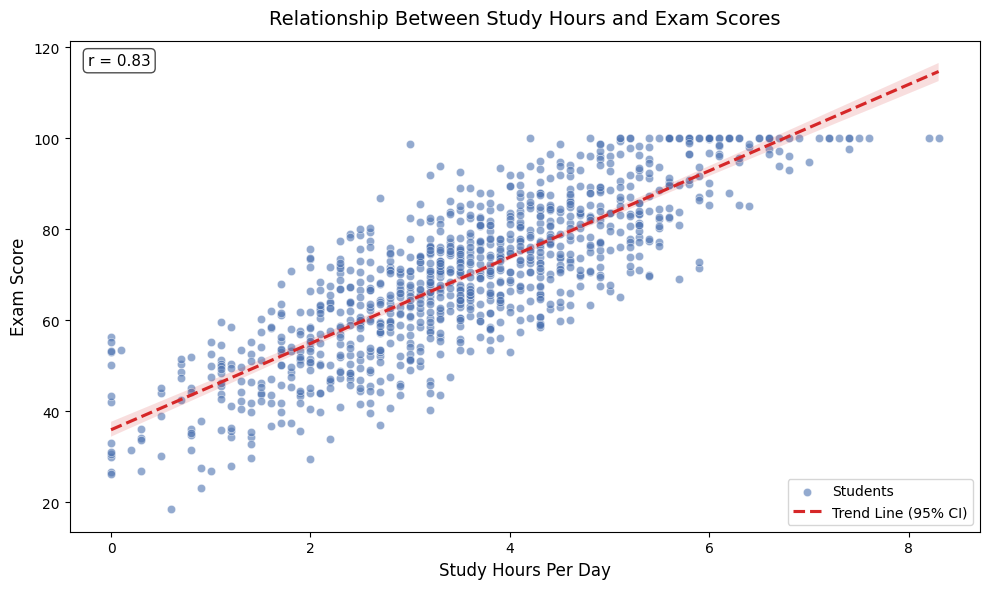

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='study_hours_per_day',
    y='exam_score',
    data=df,
    alpha=0.6,
    color='#4c72b0',
    label='Students'
)
sns.regplot(
    x='study_hours_per_day',
    y='exam_score',
    data=df,
    scatter=False,
    color='#d62728',
    ci=95,
    line_kws={'linestyle': '--'},
    label='Trend Line (95% CI)'
)
plt.title('Relationship Between Study Hours and Exam Scores', fontsize=14, pad=12)
plt.xlabel('Study Hours Per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
correlation = df['study_hours_per_day'].corr(df['exam_score'])
plt.text(
    0.02, 0.95,
    f"r = {correlation:.2f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round')
)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()



Correlation of 0.83 is close to 1, so we can assume a very strong relationship between data




-------------

##### Sleep vs Exam scores (Scatter plot)

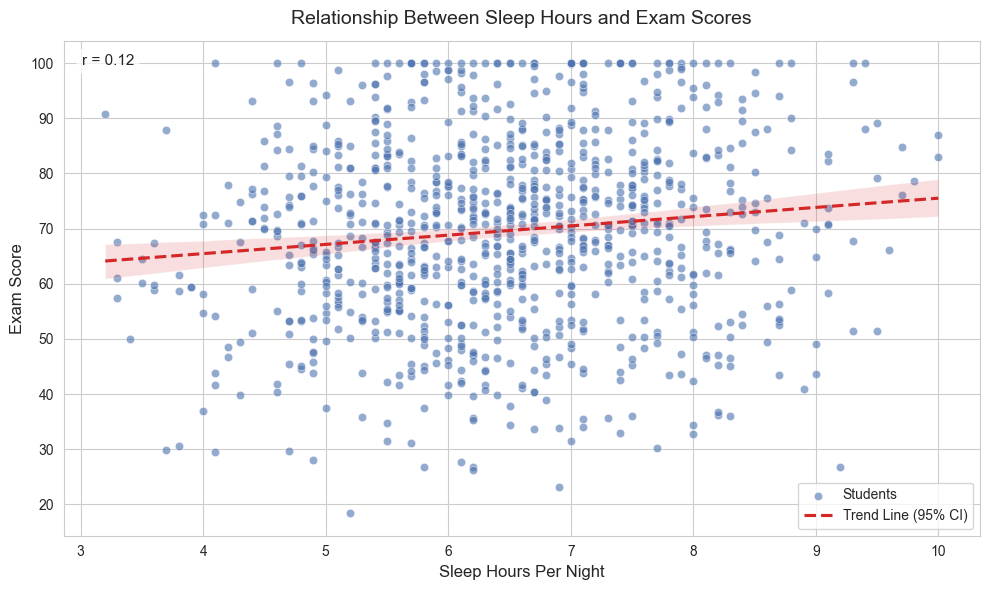

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='sleep_hours',
    y='exam_score',
    data=df,
    alpha=0.6,
    color='#4c72b0',
    label='Students'
)
sns.regplot(
    x='sleep_hours',
    y='exam_score',
    data=df,
    scatter=False,
    color='#d62728',
    ci=95,
    line_kws={'linestyle': '--'},
    label='Trend Line (95% CI)'
)
plt.title('Relationship Between Sleep Hours and Exam Scores', fontsize=14, pad=12)
plt.xlabel('Sleep Hours Per Night', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
correlation = df['sleep_hours'].corr(df['exam_score'])
plt.text(
    0.02, 0.95,
    f"r = {correlation:.2f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round')
)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

r = 0.12 - not a very strong correlation, but there is a kind of trend

----------

##### Mental health vs Exam scores (Boxplot) 

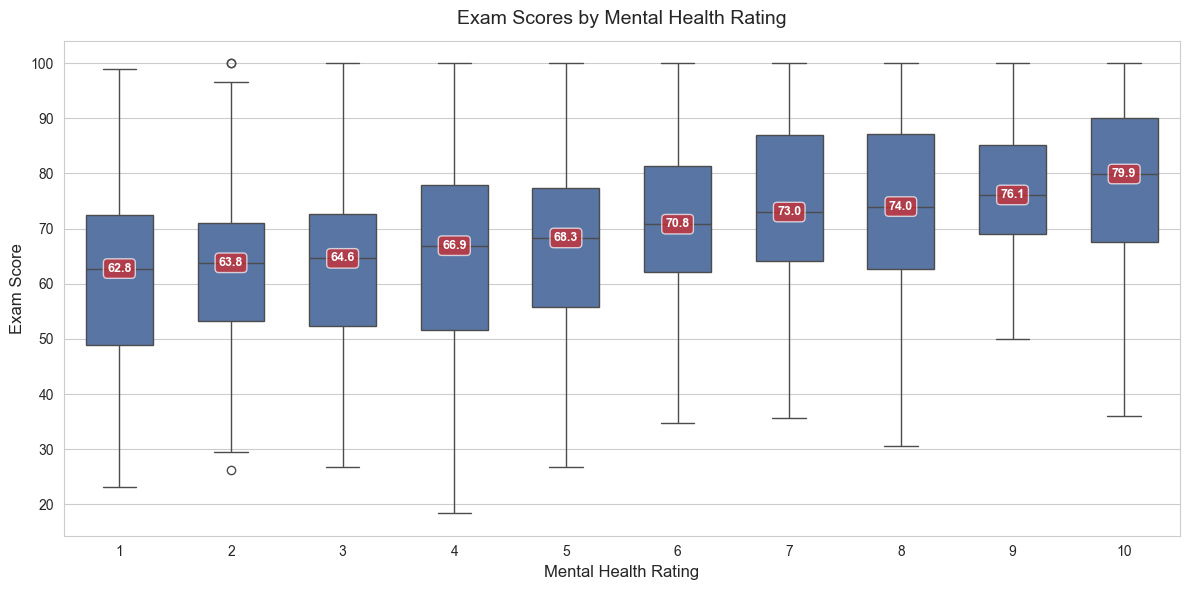

In [29]:
plt.figure(figsize=(12, 6))

#Box plot itself
sns.boxplot(
    x='mental_health_rating',
    y='exam_score',
    data=df,
    color='#4c72b0',
    width=0.6, 
    showfliers=True
)

#Calculating median values
medians = df.groupby('mental_health_rating')['exam_score'].median()

#Putting median values inside the boxes
for i, median in enumerate(medians.index):
    plt.text(
        i, medians[median], 
        f"{medians[median]:.1f}",
        ha='center',
        va='center',
        fontsize=9,  
        color='white',
        fontweight='bold',
        bbox=dict(facecolor='#d62728', alpha=0.7, boxstyle='round', pad=0.3)
    )

#plot settings
plt.title('Exam Scores by Mental Health Rating', fontsize=14, pad=12)
plt.xlabel('Mental Health Rating', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()





------

##### Social media usage vs Exam scores (Scatter)

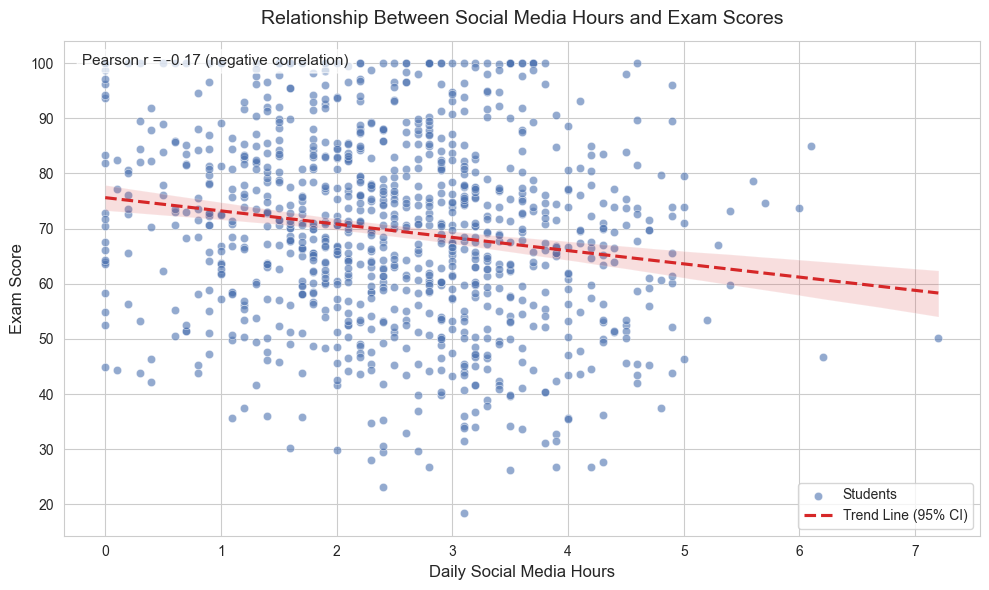

In [ ]:
df = pd.read_csv("student_habits_performance1.csv")

#Style
sns.set_style("whitegrid")
sns.set_palette("muted")

#Scatter plot gets created
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='social_media_hours',
    y='exam_score',
    data=df,
    alpha=0.6,
    color='#4c72b0',
    label='Students'
)

#Adding regression line
sns.regplot(
    x='social_media_hours',
    y='exam_score',
    data=df,
    scatter=False,
    color='#d62728',
    ci=95,
    line_kws={'linestyle': '--'},
    label='Trend Line (95% CI)'
)

#Adding title and labels
plt.title('Relationship Between Social Media Hours and Exam Scores', fontsize=14, pad=12)
plt.xlabel('Daily Social Media Hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)

#Correlation
correlation = df['social_media_hours'].corr(df['exam_score'])
plt.text(
    0.02, 0.95,
    f"Pearson r = {correlation:.2f} ({'negative' if correlation < 0 else 'positive' if correlation > 0 else 'no'} correlation)",
    transform=plt.gca().transAxes,
    fontsize=11,
    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round')
)

#Legend
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


r = -0.17, so as a trend we can expect that students with higher screen time will get lower scores

-------

##### Looking at all the correlations (Bar chart)

C:\Users\Wizard\AppData\Local\Temp\ipykernel_19352\3169788272.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


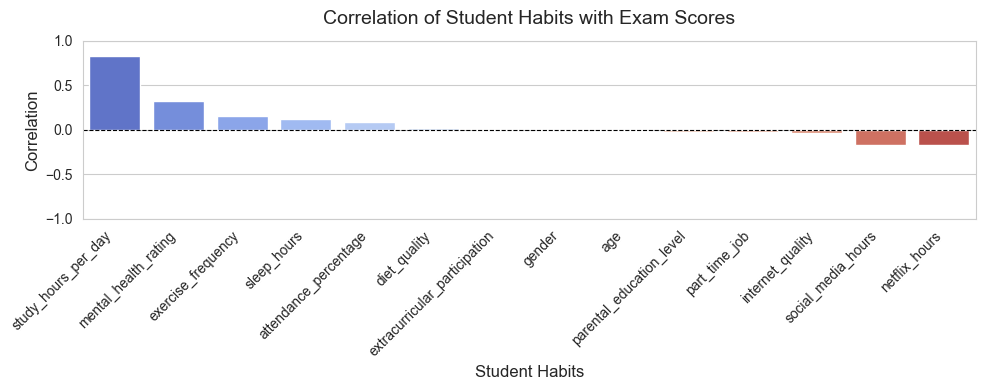

In [36]:
df = pd.read_csv("student_habits_performance1.csv")

numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlations = numerical_df.corr()['exam_score'].drop('exam_score').sort_values(ascending=False)

#Style
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

#Adding all metrics vs exam score
plt.figure(figsize=(10, 4))
ax = sns.barplot(
    x=correlations.index,
    y=correlations.values,
    palette="coolwarm"
)

#Title and labels
plt.title('Correlation of Student Habits with Exam Scores', fontsize=14, pad=12)
plt.xlabel('Student Habits', fontsize=12)
plt.ylabel('Correlation', fontsize=12)

#Customizing
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

#This makes the labels readable, otherwise it gets messy
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



An overview of all habits correlations vs exam scores



---------------------------
###  Habits
Goal: Maybe we can see some surprising stuff here or maybe not

--------------

##### Finding out how habits interact with each other


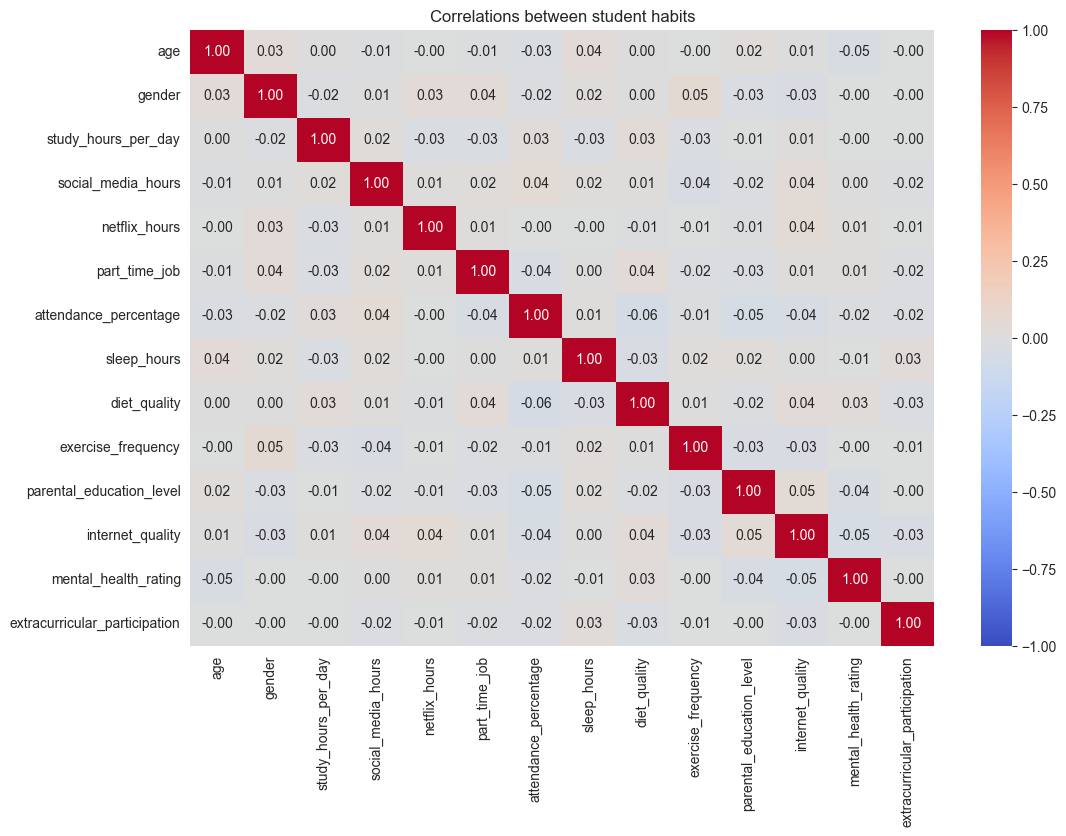

In [37]:
#Everything, excluding exam scores 
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['exam_score'])

#Creating a matrix
corr_matrix = numerical_df.corr()

#Visual side
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlations between student habits')
plt.show()


As we can see - there is nothing that exceeds 0.06, so we can safely assume that habits do not interact much between themselves in this case, which is kind of surprising.

------

#### Key habits distributions


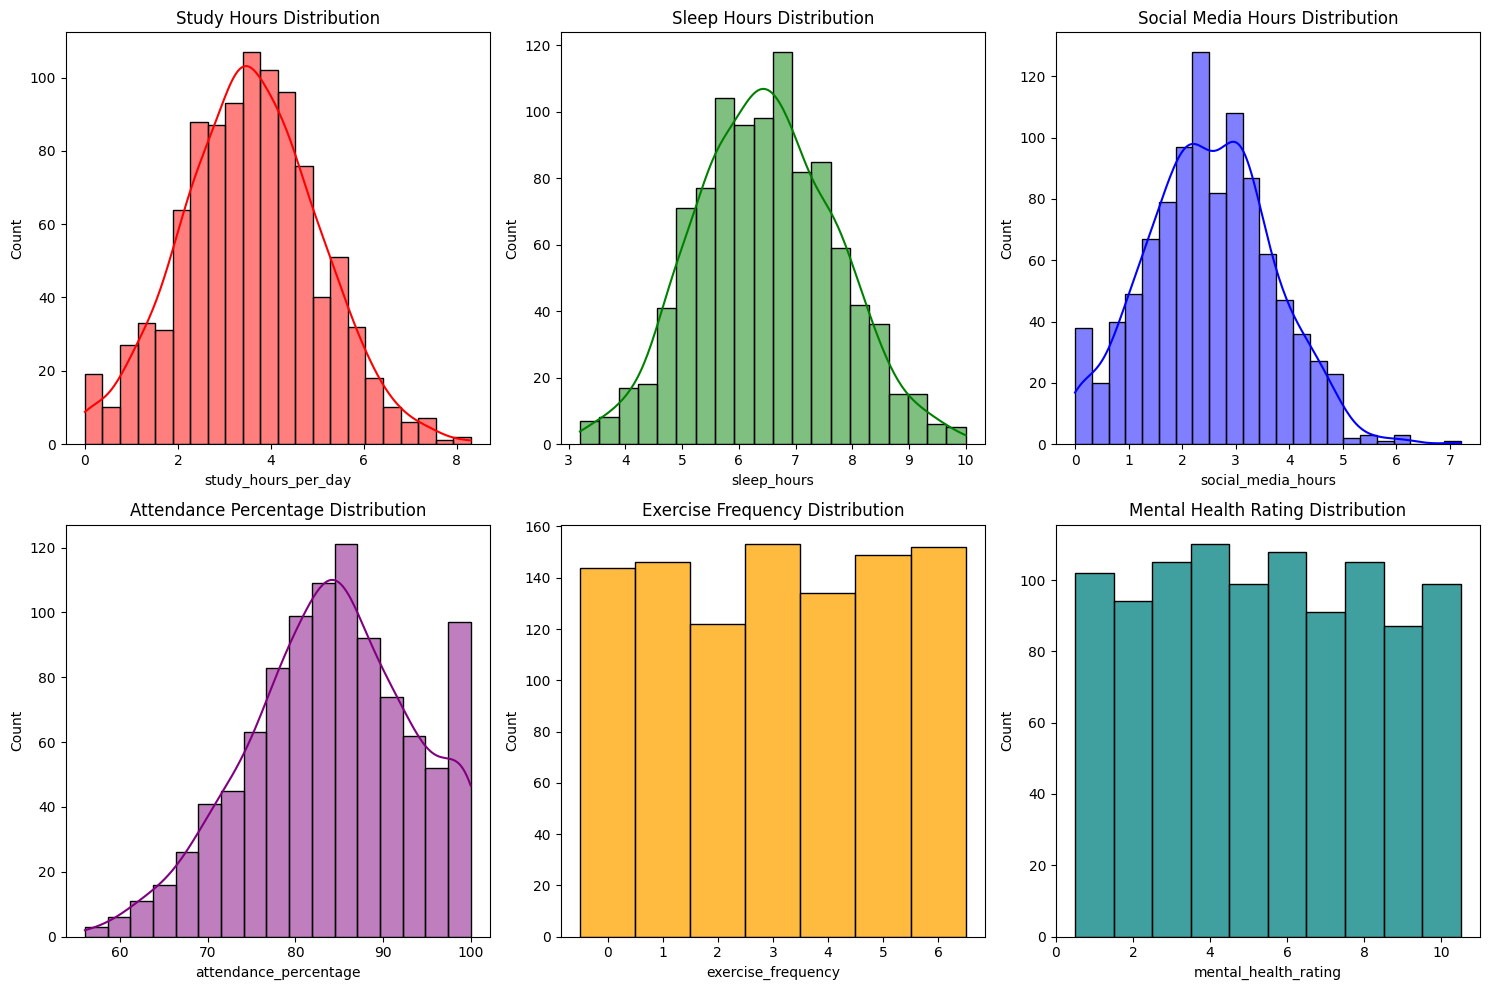

In [ ]:
#For each of the 6 values we create a separate histogram and display them on one pane
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


sns.histplot(df['study_hours_per_day'], ax=axes[0, 0], kde=True, color='red')
axes[0, 0].set_title('Study Hours Distribution')


sns.histplot(df['sleep_hours'], ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title('Sleep Hours Distribution')


sns.histplot(df['social_media_hours'], ax=axes[0, 2], kde=True, color='blue')
axes[0, 2].set_title('Social Media Hours Distribution')


sns.histplot(df['attendance_percentage'], ax=axes[1, 0], kde=True, color='purple')
axes[1, 0].set_title('Attendance Percentage Distribution')

#These two have to be formatted as discrete, otherwise it looks ugly. So sadly we do not get the KDE line showing us density estimates
sns.histplot(df['exercise_frequency'], ax=axes[1, 1], discrete=True, color='orange')
axes[1, 1].set_title('Exercise Frequency Distribution')


sns.histplot(df['mental_health_rating'], ax=axes[1, 2], discrete=True, color='teal')
axes[1, 2].set_title('Mental Health Rating Distribution')

plt.tight_layout()
plt.show()

Key habits distributions, no extreme values, everything is quite balanced for the most part

---

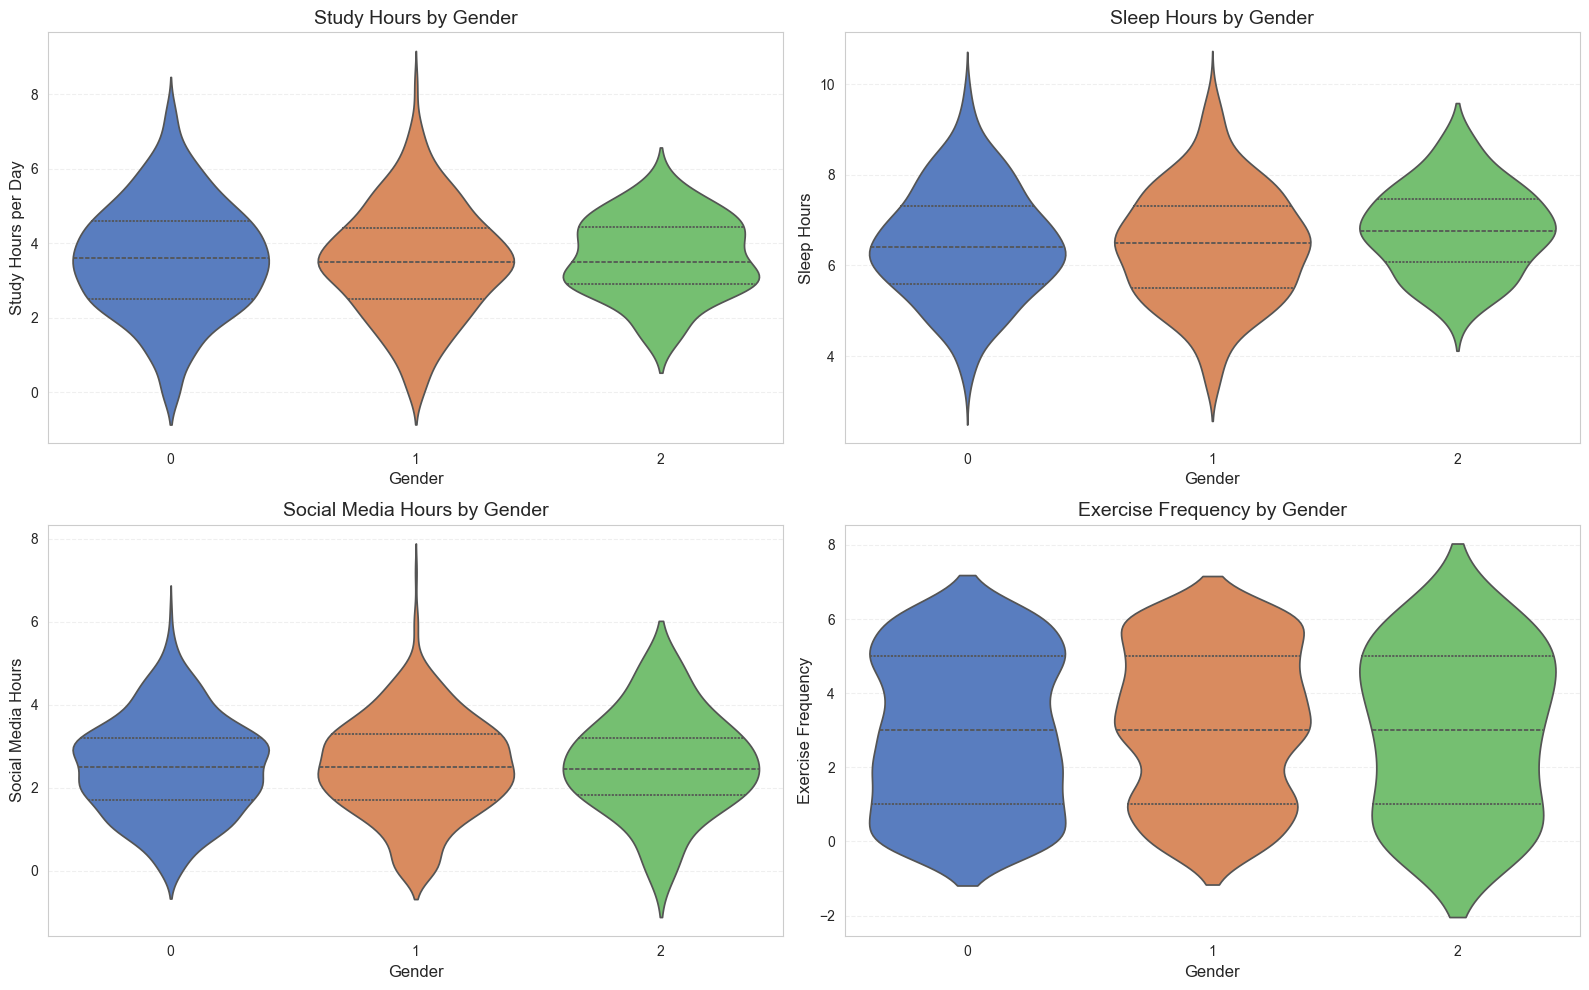

In [35]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.violinplot(data=df, x='gender', y='study_hours_per_day', hue='gender', palette='muted', legend=False, inner='quartile')
plt.title('Study Hours by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Study Hours per Day', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.subplot(2, 2, 2)
sns.violinplot(data=df, x='gender', y='sleep_hours', hue='gender', palette='muted', legend=False, inner='quartile')
plt.title('Sleep Hours by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Sleep Hours', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.subplot(2, 2, 3)
sns.violinplot(data=df, x='gender', y='social_media_hours', hue='gender', palette='muted', legend=False, inner='quartile')
plt.title('Social Media Hours by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Social Media Hours', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='gender', y='exercise_frequency', hue='gender', palette='muted', legend=False, inner='quartile')
plt.title('Exercise Frequency by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Exercise Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()



This violin plot shows almost no difference across habits of differrent genders

------

# Conclusions

Results of Data Analysis

1. Findings:

- A positive correlation was found between study hours and exam scores, confirming that more study time generally leads to better results.
- A negative trend was found between social media usage and exam performance, suggesting that excessive social media time may lower exam scores and overall student performance
- No significant correlations were found for sleep hours or exercise frequency, likely due to the dataset simulated nature.

2. Distribution Insights:

Study hours, sleep, and social media usage followed expected distributions, but no extreme values or outliers were present.

Gender and age analyses revealed no meaningful differences, as the dataset was artificially balanced.


3. Limitations:

The dataset is simulated, so it lacks real world variability and patterns.
Advanced techniques (clustering, gender and age violin plots) yield no valuable insights due to the dataset uniformity.


4. Potential 

What we could have done with real data: relationship between sleep and other habits, age/gender distribution for habits, ability to breakdown all the students into specific archetypes like "workaholics, sleep deprived, balanced, etc." and then analysing them, to highlight behavior patterns. We could have even had a cluster map, that shows these archetypes and how they are placed in relation to others. 

So there is clearly room to grow and learn and we should definetely choose real world dataset next. 
